In [2]:
import numpy as np
import json
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
import time

### Load Tweeter Data

In [3]:
# with open('../Assignment 2/tweets/tweets_1M.json') as data_file:    
with open('./tweets_1M.json') as data_file:    
    data = json.load(data_file)

## Q3.1

In [4]:
k = 100
N = [10**2, 10**3, 2*10**3, 4*10**3, 6*10**3, 8*10**3, 10**4, 2*10**4, 4*10**4, 6*10**4, 8*10**4, 10**5]
t_clustering_n = []
for n in N:
    curr = [[d['lat'], d['lng']] for d in data[:n]]
    t0 = time.time()
    _ = KMeans(n_clusters=k, max_iter=10000).fit(curr)
    t_clustering = time.time() - t0
    t_clustering_n.append(t_clustering)
    print('n = ', n, 'CPU time is ', t_clustering)

n =  100 CPU time is  0.2958028316497803
n =  1000 CPU time is  0.3699512481689453
n =  2000 CPU time is  0.4626655578613281
n =  4000 CPU time is  0.6840007305145264
n =  6000 CPU time is  1.2058444023132324
n =  8000 CPU time is  1.3437771797180176
n =  10000 CPU time is  1.4655070304870605
n =  20000 CPU time is  2.71087384223938
n =  40000 CPU time is  5.046745538711548
n =  60000 CPU time is  8.955582618713379
n =  80000 CPU time is  12.3194420337677
n =  100000 CPU time is  15.872572183609009


In [22]:
K = [10, 50, 100, 200, 500, 1000]
data_k = [[d['lat'], d['lng']] for d in data[:10**5]]
t_clustering_k = []
for k in K:
    t0 = time.time()
    _ = KMeans(n_clusters=k, max_iter=10000).fit(data_k)
    t_clustering = time.time() - t0
    t_clustering_k.append(t_clustering)
    print('k = ', k, 'CPU time is ', t_clustering)

k =  10 CPU time is  2.288602828979492
k =  50 CPU time is  18.544316053390503
k =  100 CPU time is  38.5298171043396
k =  200 CPU time is  105.7336356639862
k =  500 CPU time is  328.12894105911255
k =  1000 CPU time is  673.9429159164429


## Q3.2

In [17]:
for i in range(len(N)):
    curr = [[d['lat'], d['lng']] for d in data[:N[i]]]
    t0 = time.time()
    _ = MiniBatchKMeans(n_clusters=100, max_iter=10000).fit(curr)
    t_clustering = time.time() - t0
    increase = (t_clustering_n[i] - t_clustering) / t_clustering_n[i] * 100
    print('n =', N[i], ', CPU time is', t_clustering, 'increased by', increase, "%")

n = 100 , CPU time is 0.22351384162902832 increased by 73.37952544659933 %
n = 1000 , CPU time is 0.3039970397949219 increased by 72.62052185355435 %
n = 2000 , CPU time is 0.1799759864807129 increased by 86.68371435733434 %
n = 4000 , CPU time is 0.24611902236938477 increased by 88.30071493502821 %
n = 6000 , CPU time is 0.4694957733154297 increased by 83.4359483881995 %
n = 8000 , CPU time is 0.22918081283569336 increased by 93.15420804184387 %
n = 10000 , CPU time is 0.9284617900848389 increased by 75.06042845266721 %
n = 20000 , CPU time is 0.4941880702972412 increased by 93.08286608133062 %
n = 40000 , CPU time is 2.0515658855438232 increased by 90.13373651642785 %
n = 60000 , CPU time is 5.491419076919556 increased by 77.69648599895504 %
n = 80000 , CPU time is 1.1916799545288086 increased by 95.97550818200214 %
n = 100000 , CPU time is 1.4075579643249512 increased by 96.30351397107405 %


In [24]:
for i in range(len(K)):
    t0 = time.time()
    _ = MiniBatchKMeans(n_clusters=K[i], max_iter=10000, init_size=3*K[i]).fit(data_k)
    t_clustering = time.time() - t0
    increase = (t_clustering_k[i] - t_clustering) / t_clustering_k[i] * 100
    print('k =', K[i], ', CPU time is', t_clustering, 'increased by', increase, "%")

k = 10 , CPU time is 0.8022170066833496 increased by 64.94730337106745 %
k = 50 , CPU time is 3.549004077911377 increased by 80.86203843973796 %
k = 100 , CPU time is 1.2910478115081787 increased by 96.64922413721303 %
k = 200 , CPU time is 1.0156538486480713 increased by 99.03942218361266 %
k = 500 , CPU time is 3.6834230422973633 increased by 98.87744646040417 %
k = 1000 , CPU time is 6.774209022521973 increased by 98.99483934580569 %


## Q3.3

In [62]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
data3 = [[d['lat'], d['lng']] for d in data[:100000]]
clustering = DBSCAN(eps=0.004, min_samples=100, n_jobs=3).fit(data3)
print(len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0))

128


In [8]:
for i in [0.005, 0.01, 0.1, 0.2, 0.3]:
    data3 = [[d['lat'], d['lng']] for d in data[:100000]]
    clustering = DBSCAN(eps=i, min_samples=100, n_jobs=3).fit(data3)
    n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print("eps =", i, "Estimated number of clusters:", n_clusters_)

eps = 0.005 Estimated number of clusters: 143
eps = 0.01 Estimated number of clusters: 105
eps = 0.1 Estimated number of clusters: 27
eps = 0.2 Estimated number of clusters: 10
eps = 0.3 Estimated number of clusters: 4


In [63]:
for i in [0.00001, 0.0001, 0.001, 0.002, 0.003]:
    data3 = [[d['lat'], d['lng']] for d in data[:100000]]
    clustering = DBSCAN(eps=i, min_samples=100, n_jobs=3).fit(data3)
    n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
    print("eps =", i, "Estimated number of clusters:", n_clusters_)

eps = 1e-05 Estimated number of clusters: 5
eps = 0.0001 Estimated number of clusters: 18
eps = 0.001 Estimated number of clusters: 59
eps = 0.002 Estimated number of clusters: 92
eps = 0.003 Estimated number of clusters: 104


## Q3.4

In [17]:
data4 = np.array([[d['lat'], d['lng']] for d in data])

In [18]:
# first step of clustering using mini batch k-means
k = 1000000//100000
clustering_1 = MiniBatchKMeans(n_clusters=k, max_iter=10000).fit(data4)

In [53]:
# Reference: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# approximate radius of earth in meters
from math import sin, cos, sqrt, atan2, radians
def measure(loc1, loc2):
    R = 6373.0
    lat1 = radians(loc1[0])
    lon1 = radians(loc1[1])
    lat2 = radians(loc2[0])
    lon2 = radians(loc2[1])

    dlon, dlat = lon2 - lon1, lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [26]:
# second step of clustering using DBSCAN
# 1 degree ~= 111,000m
# 100m ~= 0.0009
# therefore estimated eps = 0.001
clustering_2 = []
for label in range(k):
    data_batch = data4[clustering_1.labels_ == label]
    cluster = DBSCAN(eps=0.001, min_samples=100, n_jobs=-1).fit(data_batch)
    print("label:", label, "cluster added")
    clustering_2.append(cluster)

label: 0 cluster added
label: 1 cluster added
label: 2 cluster added
label: 3 cluster added
label: 4 cluster added
label: 5 cluster added
label: 6 cluster added
label: 7 cluster added
label: 8 cluster added
label: 9 cluster added


In [54]:
# calculate the exact distances with callable metric function is too slow
clustering_3 = []
for label in range(10):
    data_batch = data4[clustering_1.labels_ == label]
    cluster = DBSCAN(eps=0.1, min_samples=100, metric=measure, n_jobs=-1).fit(data_batch)
    print("label:", label, "cluster added")
    clustering_3.append(cluster)

label: 0 cluster added
label: 1 cluster added
label: 2 cluster added
label: 3 cluster added
label: 4 cluster added
label: 5 cluster added
label: 6 cluster added
label: 7 cluster added
label: 8 cluster added
label: 9 cluster added


In [28]:
n_clusters_ = []
for i in range(len(clustering_2)):
    n_clusters_.append(len(set(clustering_2[i].labels_)) - (1 if -1 in clustering_2[i].labels_ else 0))
print("Estimated number of important location is:", sum(n_clusters_))

Estimated number of important location is: 1605


In [58]:
n_clusters_3 = []
for i in range(len(clustering_3)):
    n_clusters_3.append(len(set(clustering_3[i].labels_)) - (1 if -1 in clustering_3[i].labels_ else 0))
print("Estimated number of important location is:", sum(n_clusters_3))

Estimated number of important location is: 1605


In [70]:
# rerun the chosen process for timing purposes
t0 = time.time()
    
k = 1000000//100000
clustering_1 = MiniBatchKMeans(n_clusters=k, max_iter=10000).fit(data4)

clustering_2 = []
for label in range(k):
    data_batch = data4[clustering_1.labels_ == label]
    cluster = DBSCAN(eps=0.001, min_samples=100, n_jobs=-1).fit(data_batch)
    clustering_2.append(cluster)

t_clustering = time.time() - t0
print('Total time to cluster the full 1 million Tweeter records is', t_clustering)

Total time to cluster the full 1 million Tweeter records is 16.14872407913208


## Q3.5 (Bonus +5)

In [93]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
import matplotlib.pyplot as plt

def visualize_cluster(cluster1_label, cluster2_label):
    labels = clustering_2[cluster1_label].labels_
    unique_labels = {cluster2_label}
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    data_batch = data4[clustering_1.labels_ == cluster1_label]
    for k, col in zip(unique_labels, colors):
        xy = data_batch[labels == k]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=2, markeredgewidth=0.0)
    
    lat, lon = np.mean(xy[:, 0]), np.mean(xy[:, 1])
    print("lat:", lat, "lon:", lon)
    plt.plot(lat, lon, 'bo')
    plt.show()

lat: 37.38257703593221 lon: -122.03987915677966


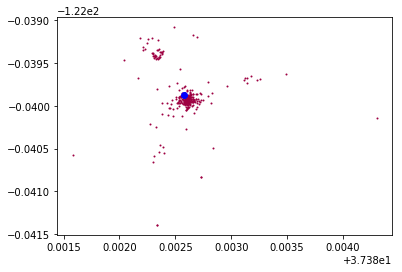

In [94]:
visualize_cluster(0, 99)

In [98]:
labels = clustering_2[0].labels_
data_batch = np.array([d['text'] for d in data])
data_batch_1 = data_batch[clustering_1.labels_ == 0]
data_batch_2 = data_batch_1[labels == 99]
for i in range(len(data_batch_2)):
    print(data_batch_2[i])

😒
Best ringtone ever lmfao
Idk how it happened but I listened to all of Lana del gey's albums on spotify and now I love her
I feel so adult cause of today's event. But then I look at my @Louis_Tomlinson wall lmfao
God I love baseball
I love how happy people are for me. Unlike my stupid coworkers that think I'm just bragging and think I'm too cool. Get real.
@marissayall is the game against mi escuelita?
My purse and earphones are downstairs. Blah.
I just wanna go to twin peeks again. It should be spelled peeks.
Too much tweeting today.
I'm just so happy and full of joy and determination and all the good stuff. In the words of CJ Johnson, "you can't stop me!"
And soooo relieved.
Goodnight
Te amo!!! Nite nite 
@juanmarinbear
@keyladelarge viejaaa manifiestatee xD necesito platikarsss
I don't even know what it's like to wake up without a headache anymore lol
@keyladelarge 😂 si estuviera alla te llevaria una caja de donas dw krispy cream, un helado de nutella y un chai latte
@keyladelarge 